# import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings(action='ignore')

In [52]:
#중심점이 4개인 150개의 점데이터를 무작위 생성
points, labels = make_blobs(n_samples=150, centers=4, n_features=2)

#무작위로 생성된 점의 좌표 10개 출력
print(points.shape)
print(points[:10])
print(labels.shape)
print(labels[:10])

(150, 2)
[[  0.84608798  -6.9949067 ]
 [ -9.90922033 -10.18483555]
 [  0.89128785  -7.23158958]
 [ -3.85494706  -5.03123476]
 [ -4.01121891  -4.00442262]
 [  8.76178295  -6.76734966]
 [  1.0102388   -6.69390657]
 [  8.53044206  -5.63777572]
 [  0.04530252  -8.54773294]
 [  1.14435276  -6.19830942]]
(150,)
[3 1 3 0 0 2 3 2 3 3]


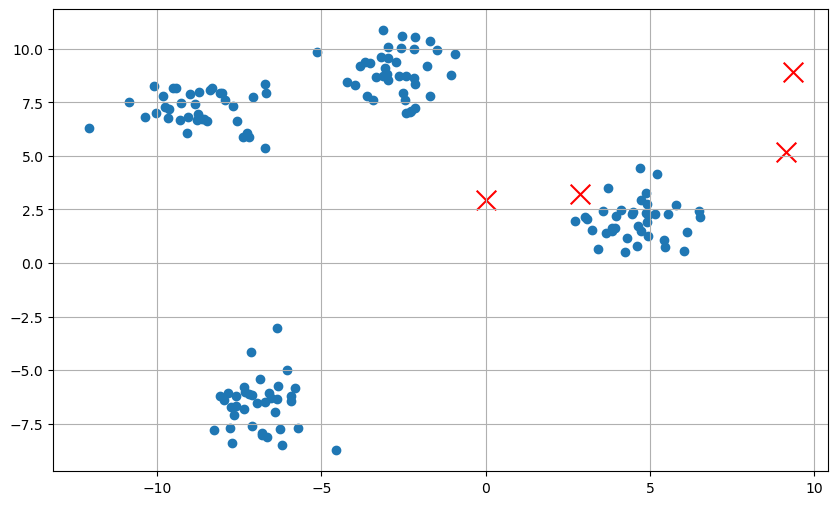

In [30]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(111)

points_df = pd.DataFrame(points, columns=['X', 'Y'])
points_df

#중심점 생성
centers = np.random.rand(4, 2) * 10
#0부터 1사이의 난수를 생성
axes.scatter(points_df['X'], points_df['Y'])
axes.scatter(centers[:, 0], centers[:, 1], color='red', marker='x', s=200)
axes.grid()
plt.show()

In [42]:
np.random.rand(4, 2)

array([[0.00400042, 0.96120582],
       [0.67949123, 0.29676392],
       [0.89464888, 0.40386508],
       [0.25325304, 0.48953245]])

# KMeans

In [53]:
from sklearn.cluster import KMeans

k_cluster = KMeans(n_clusters=4)
k_cluster

KMeans(n_clusters=4)

In [54]:
k_cluster.fit(points)

print(k_cluster.labels_)
print(type(k_cluster.labels_))
print(np.shape(k_cluster.labels_))
print(np.unique(k_cluster.labels_))

[3 2 3 1 1 0 3 0 3 3 0 2 1 3 2 2 3 0 0 3 2 2 2 1 1 2 3 0 3 0 2 0 2 2 2 1 1
 1 1 2 3 2 1 0 2 3 0 2 2 3 0 3 1 3 3 1 2 2 1 1 0 1 0 2 0 0 2 1 1 1 2 0 0 2
 2 2 3 2 0 2 2 0 0 1 1 3 3 0 2 0 0 2 0 3 1 1 1 1 1 3 3 0 1 1 3 0 0 0 2 0 2
 3 1 3 1 1 1 0 2 0 3 2 3 3 2 1 1 3 3 2 3 0 1 3 2 1 3 1 3 1 2 3 3 0 3 0 0 1
 0 0]
<class 'numpy.ndarray'>
(150,)
[0 1 2 3]


In [55]:
#중심점 가져오기
centers = k_cluster.cluster_centers_
centers

array([[ 8.58298451, -6.19741905],
       [-4.14096557, -5.05262575],
       [-9.55039814, -8.58751442],
       [ 0.96368061, -7.10532271]])

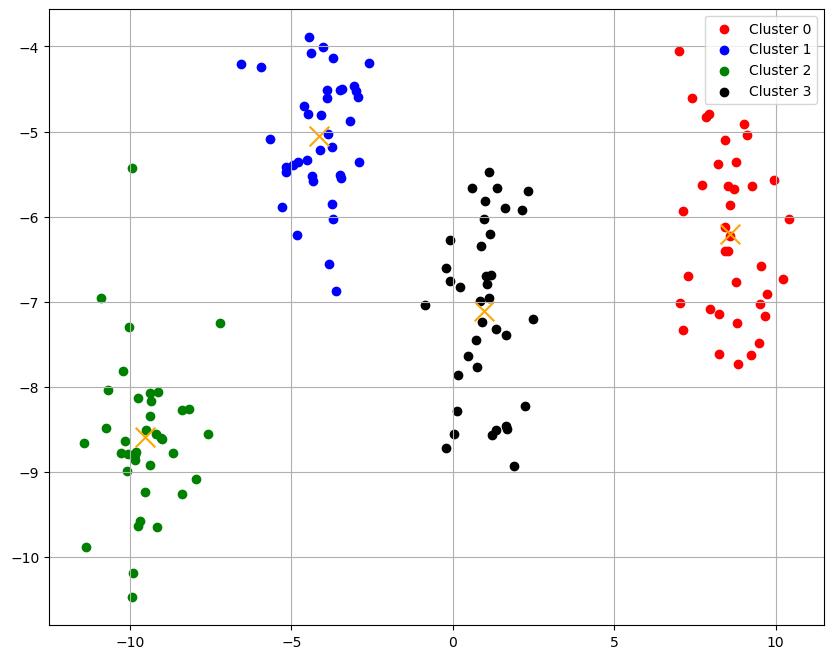

In [56]:
color = {0:"red", 1:'blue', 2:'green', 3:'black'}

plt.figure(figsize=(10, 8))

for cluster in range(4):
    cluster_sub = points[k_cluster.labels_ == cluster]
    plt.scatter(cluster_sub[:, 0], cluster_sub[:, 1], c = color[cluster],
               label=f"Cluster {cluster}")
    
#중심점 추가
plt.scatter(centers[:, 0], centers[:, 1], color='orange', marker='x', s=200)

plt.legend()
plt.grid()
plt.show()

In [37]:
points

array([[ -8.55733589,   6.7008234 ],
       [ -6.71617156,   8.35598818],
       [ -9.09089591,   6.07573973],
       [ -8.72481041,   7.98565359],
       [ -8.63926806,   6.72330604],
       [ -9.31327307,   6.67019368],
       [ -6.69438367,   7.95744194],
       [-10.09921171,   8.24138486],
       [ -8.33334048,   8.18927811],
       [ -6.70529438,   5.37143512],
       [ -8.39450833,   8.09815697],
       [ -8.85922935,   7.4408503 ],
       [ -8.79275592,   6.67192257],
       [-10.03862416,   6.98902168],
       [ -9.6308485 ,   7.20878647],
       [ -7.25231094,   6.08570742],
       [ -9.04645001,   6.83052198],
       [ -7.20591645,   5.89338154],
       [ -9.81983641,   7.78562639],
       [ -8.09103415,   7.93389318],
       [ -7.57141661,   6.61585345],
       [ -7.93872788,   7.63082244],
       [ -8.99011285,   7.91184012],
       [ -9.27837224,   7.45426349],
       [ -7.39705447,   5.88766076],
       [ -8.76852567,   6.93820932],
       [-10.86347034,   7.50997723],
 

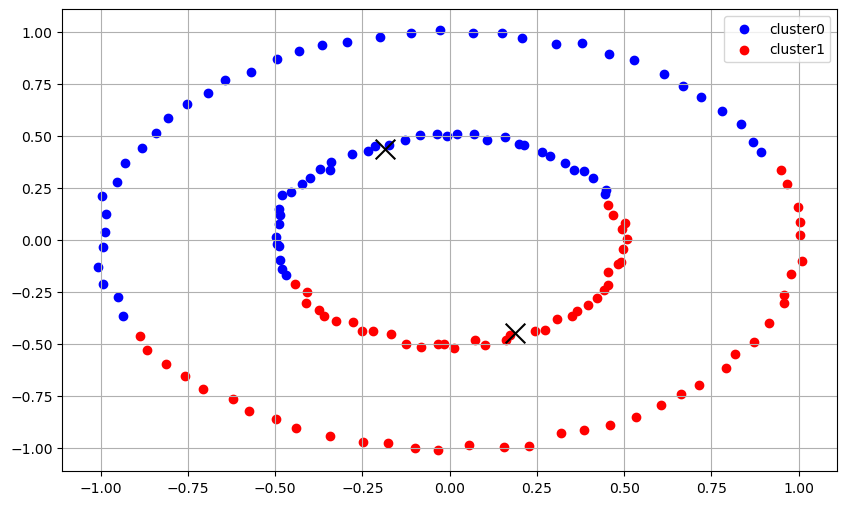

In [74]:
from sklearn.datasets import make_circles

circle_points, circle_labels = make_circles(n_samples= 150, factor =0.5,
                                           noise = 0.01)

#n_samples : 생성할 데이터 샘플의 총개수
#factor : 원안의 원과 원 바깥의 원의 크기 비율, 값이 작을 수록 안쪽원이 작아짐
#       값이 커질수록 안쪽의 원이 커진다
#noise : 값이 0에 가까울 수록 노이즈 적고 값이 노이즈가 많음

plt.figure(figsize = (10, 6))

#모델 생성
circle_kmeans = KMeans(n_clusters = 2)
circle_kmeans

#모델 학습
circle_kmeans.fit(circle_points)

color = {0:"blue", 1:'red'}
for i in range(2):
    cluster_sub = circle_points[circle_kmeans.labels_ == i]
    plt.scatter(cluster_sub[:, 0], cluster_sub[:, 1], 
                c = color[i], label = f"cluster{i}")

#중심점 표시
centers = circle_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=200)
    
plt.grid()
plt.legend()
plt.show()

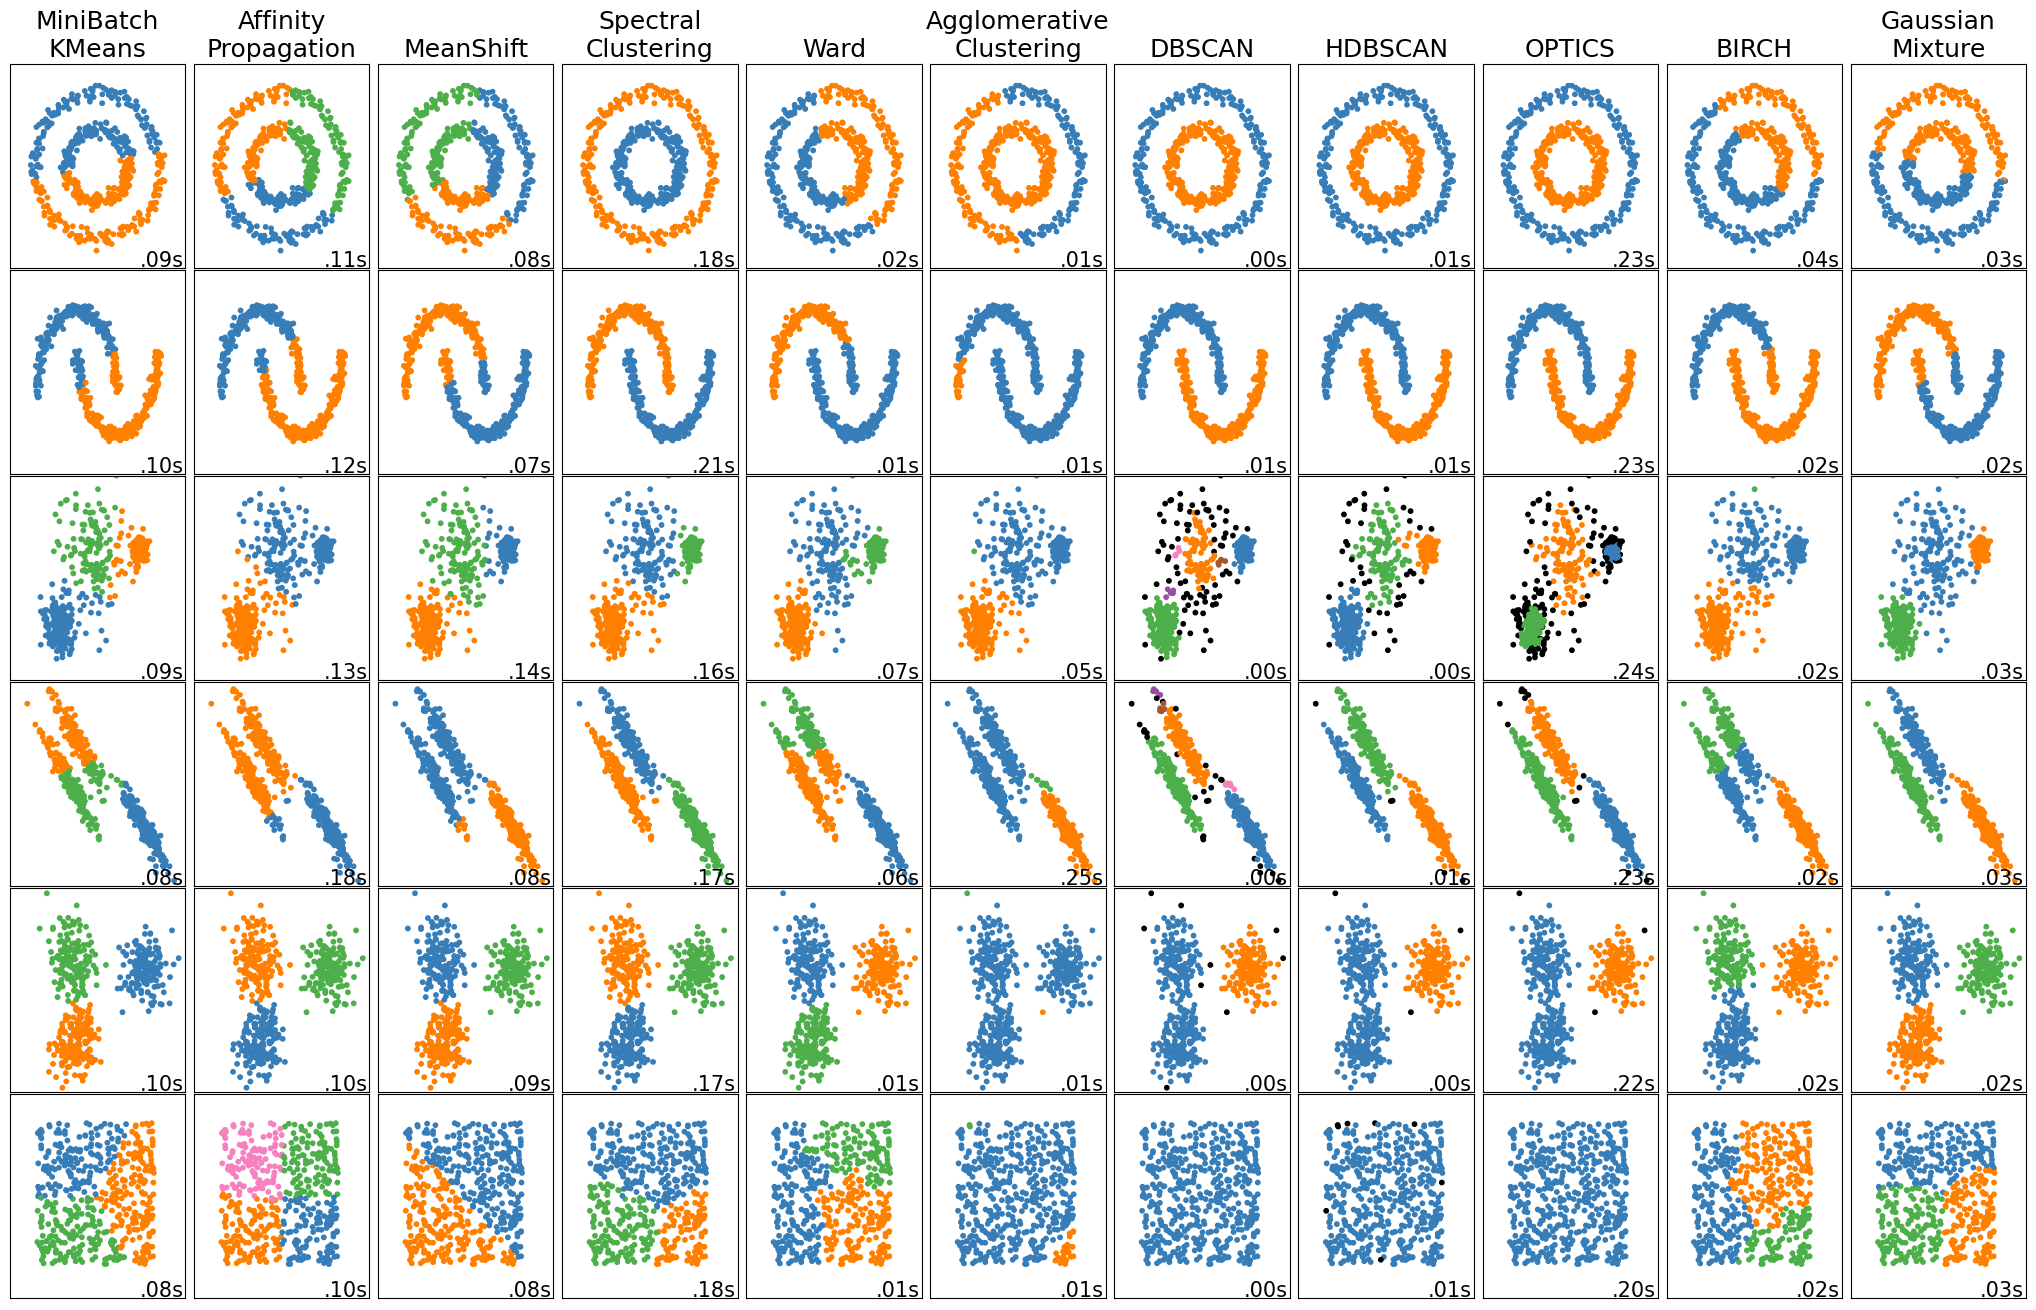

In [75]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(
        n_clusters=params["n_clusters"],
        random_state=params["random_state"],
    )
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=params["random_state"],
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    hdbscan = cluster.HDBSCAN(
        min_samples=params["hdbscan_min_samples"],
        min_cluster_size=params["hdbscan_min_cluster_size"],
        allow_single_cluster=params["allow_single_cluster"],
    )
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"],
        preference=params["preference"],
        random_state=params["random_state"],
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        metric="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"],
        covariance_type="full",
        random_state=params["random_state"],
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("HDBSCAN", hdbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()